In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from fmnist_dataset import Fashion_MNIST

Using TensorFlow backend.


In [2]:
def limit_mem():
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config = cfg))


In [3]:
limit_mem() #***:一定要有这行，不然就会报错。

In [4]:
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
fmnist = Fashion_MNIST()
x, y = fmnist.train.next_batch(1)
print(x.shape)
print(y.shape)
print(x)

(1, 28, 28, 1)
(1, 10)
[[[[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  1.]
   [  0.]
   [  0.]
   [ 71.]
   [101.]
   [105.]
   [ 98.]
   [103.]
   [ 15.]
   [  0.]
   [  4.]
   [  3.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  5.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [255.]
   [192.]
   [200.]
   [191.]
   [203.]
   [144.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  6.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [ 59.]
   [176.]
   [225.]
   [244.]
   [198.]
   [211.]
   [215.]
   [218.]
   [182.]
   [ 81.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [ 55.]
   [155.]
   [213.]
   [243.]
   [238.]
   [222.]
   [236.]
 

In [3]:
print(fmnist.train[0])

TypeError: 'dataset' object does not support indexing

In [5]:
from mnist import MNIST
data_dir="../data"
data = MNIST(data_dir, return_type="lists")
x_train,y_train = data.load_training()

In [6]:
print(len(x_train))
print(type(x_train))

60000
<class 'list'>


In [7]:
import numpy as np
x_train = np.asarray(x_train).reshape((-1, 28, 28, 1))
y_train = np.asarray(y_train)

In [8]:
print(x_train[0].shape)
print(y_train[0])

(28, 28, 1)
9


In [9]:
x_test,y_test = data.load_testing()
x_test = np.asarray(x_test).reshape((-1, 28, 28, 1))
y_test = np.asarray(y_test)

In [10]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000,)


In [11]:
val_size = 5000
x_val,y_val = x_train[-val_size:],y_train[-val_size:]
x_train,y_train = x_train[:-val_size],y_train[:-val_size]

In [12]:
print(x_train.shape)

(55000, 28, 28, 1)


In [13]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test /255

In [14]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_val = to_categorical(y_val,10)

In [15]:
model_path = '../model/naive_model.h5'

In [16]:
from keras.models import load_model
import os
if not os.path.exists(model_path):
    input_shape = (img_rows, img_cols, 1)
    model = Sequential()
    model.add(Conv2D(32,
                     activation='relu',
                     input_shape=input_shape,
                     nb_row=3,
                     nb_col=3))
    model.add(Conv2D(64, activation='relu',
                     nb_row=3,
                     nb_col=3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.metrics.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_val, y_val))
    # import matplotlib.pyplot as plt
    # %matplotlib inline
    # # summarize history for accuracy
    # plt.plot(model.history['acc'])
    # plt.plot(model.history['val_acc'])
    # plt.title('model accuracy')
    # plt.ylabel('accuracy')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    # plt.show()
    # # summarize history for loss
    # plt.plot(model.history['loss'])
    # plt.plot(model.history['val_loss'])
    # plt.title('model loss')
    # plt.ylabel('loss')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    # plt.show()
    model.save(model_path)
else:
    model = load_model(model_path)

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22198901411890984
Test accuracy: 0.9194


In [18]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [19]:
num_test = x_test.shape[0]
mask = np.random.choice(num_test,2000)
x_test_batch = x_test[mask]
y_test_batch = y_test[mask]
score = model.evaluate(x_test_batch, y_test_batch, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27270290595293045
Test accuracy: 0.9


In [20]:
y_test_batch[:4]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
model.predict(x_test_batch)[0]

array([6.6258130e-04, 1.3711763e-06, 9.9007517e-01, 2.0163157e-04,
       1.1448442e-03, 3.6946082e-07, 7.8882128e-03, 5.3226319e-07,
       2.3902121e-05, 1.3518287e-06], dtype=float32)

In [22]:
np.argmax(model.predict(x_test_batch)[0])

2

In [23]:
y_test_batch[0] 

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
predictions = model.predict(x_test_batch)
idx = 0
cnt = 0
x_pred_true = []
y_pred_true = []
while cnt < 1000:
    if np.argmax(predictions[idx]) == np.argmax(y_test_batch[idx]):
        x_pred_true.append(x_test_batch[idx])
        y_pred_true.append(y_test_batch[idx])
        cnt += 1
    idx += 1

In [25]:
x_pred_true = np.asarray(x_pred_true)
y_pred_true = np.asarray(y_pred_true)

In [26]:
print(x_pred_true.shape)
print(y_pred_true.shape)

(1000, 28, 28, 1)
(1000, 10)


In [27]:
y_pred_true[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
np.argmax(y_pred_true,axis = 1)[:100]

array([2, 8, 6, 0, 4, 0, 3, 2, 8, 9, 0, 5, 9, 1, 6, 3, 5, 2, 1, 6, 9, 8,
       9, 5, 1, 6, 5, 7, 2, 8, 1, 5, 8, 6, 4, 5, 2, 2, 5, 8, 0, 5, 7, 4,
       1, 9, 7, 2, 9, 9, 2, 8, 3, 8, 2, 0, 6, 4, 1, 4, 7, 6, 9, 7, 5, 8,
       8, 7, 0, 5, 6, 3, 1, 5, 9, 8, 5, 0, 3, 8, 5, 3, 9, 8, 5, 9, 2, 2,
       9, 6, 1, 9, 3, 4, 9, 1, 3, 3, 9, 9])

plot...


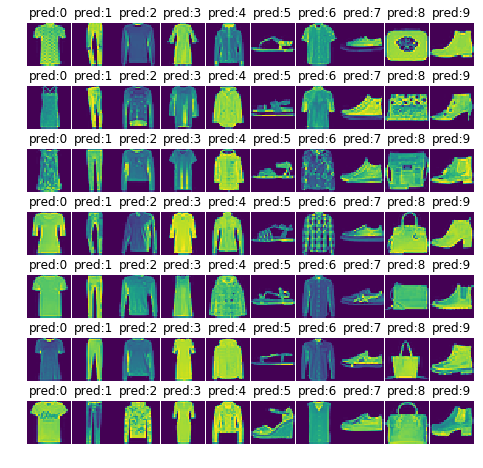

In [29]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline
print('plot...')
samples_per_class = 7
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(7, 10)
gs.update(wspace=0.035, hspace=0.1)  # set the spacing between axes.
classes = range(10)
for y_, cls in enumerate(classes):
    idxs = np.flatnonzero(y_ == np.argmax(y_pred_true, axis=1))#1代表行
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y_ 
        ax = plt.subplot(gs[plt_idx])
        ax.axis('off')
        plt.imshow(x_pred_true[idx].reshape((28, 28)))
        pred = np.argmax(y_pred_true[idx])
        plt.title('pred:' + str(pred))
plt.show()

In [28]:
# https://cv-tricks.com/how-to/breaking-deep-learning-with-adversarial-examples-using-tensorflow/

In [29]:
# https://www.tensorflow.org/api_docs/cc/group/math-ops
# https://www.tensorflow.org/api_docs/cc/class/tensorflow/ops/sign

In [30]:
import keras.backend as K
import tensorflow as tf
from tensorflow import float32
from keras import metrics

In [31]:
model.output

<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>

In [135]:
# class Transformer():
#     def __init__(self,model):
#         old = range(10)
#         new = list(range(1,10))
#         new.append(0)
#         self.old2new = dict(zip(old,new))
#         self.model = model
#         self.alpha = 0.01 #学习率
#     def gen_adv(self,x,label,iterations = 50):
#         x = tf.reshape(x,(-1,28,28,1))
# #         print(x.dtype) #float64
#         x = tf.cast(x,tf.float32)
#         x_adv_val = x
#         label = np.argmax(label)
#         target= self.old2new[label]
#         target = to_categorical(target,10,dtype='float32')
#         loss = -1*K.categorical_crossentropy(target,self.model.output)
#         grads = K.gradients(loss,model.input)
#         delta = K.sign(grads[0]) 
#         x_adv_op = x_adv - self.alpha * delta
#         sess = K.get_session()
#         for _ in range(iterations):
#             x_adv = sess.run(x_adv_op, feed_dict={model.input:x_adv_val})
#             x_adv = tf.cast(x_adv,tf.float32)
#             x_adv_val = x_adv.eval()
#         return x_adv
#这样写是有问题的，sess需要输入是数组，输出是tensor，x_adv_op是op

In [65]:
class Transformer():
    def __init__(self,model):
        old = range(10)
        new = list(range(1,10))
        new.append(0)
        self.old2new = dict(zip(old,new))
        self.model = model
        self.alpha = 0.01 #学习率
    def gen_adv(self,x,label,iterations = 30):
        x = np.reshape(x,(-1,28,28,1))
        print(x.shape)
        label = np.argmax(label)
        target= self.old2new[label]
        print(target)
        target = to_categorical(target,10,dtype='float32')
        print(target)
        for _ in range(iterations):
            print(type(x))
            x = self.one_iter(x,target)
        x_adv = x
        return x_adv
    def one_iter(self,x,target):
        print(x.shape)
        target_variable = K.variable(target)
        print(model.output)
        print(target_variable)
#         loss = -1*metrics.categorical_crossentropy(self.model.output,target_variable)
        loss = metrics.categorical_crossentropy(self.model.output,target_variable)
        gradients = K.gradients(loss,model.input)
        get_grad_values = K.function([model.input],gradients)
        grad_values = get_grad_values([x])[0]
        delta = K.sign(grad_values) 
        x_adv = x - self.alpha * delta
        return x_adv

In [66]:
# https://fairyonice.github.io/Generate-adversarial-examples-using-TensorFlow.html

In [67]:
transformer = Transformer(model)

In [68]:
y_pred_true[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [69]:
print(type(x_pred_true[0]))

<class 'numpy.ndarray'>


In [70]:
x_pred_true[0].shape

(28, 28, 1)

In [71]:
# https://stackoverflow.com/questions/51872592/invalidargumenterror-you-must-feed-a-value-for-placeholder-tensor-placeholder
# tf.reset_default_graph()
new_image = transformer.gen_adv(x_pred_true[0],y_pred_true[0],1)

(1, 28, 28, 1)
8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
<class 'numpy.ndarray'>
(1, 28, 28, 1)
Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)
<tf.Variable 'Variable_2:0' shape=(10,) dtype=float32_ref>


ValueError: Tensor("Log_2:0", shape=(10,), dtype=float32) must be from the same graph as Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32).

In [69]:
x = x_pred_true[0]
x = np.reshape(x,(-1,28,28,1))
print(x.shape)

(1, 28, 28, 1)


In [70]:
print(y_pred_true[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [71]:
target = 6
print(target)
target = to_categorical(target,10,dtype='float32')
print(target)

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [72]:
target_variable = K.variable(target)
print(model.output)
print(target_variable)

Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)
<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>


In [73]:
loss = -1*metrics.categorical_crossentropy(model.output,target_variable)
gradients = K.gradients(loss,model.input)
get_grad_values = K.function([model.input],gradients)
grad_values = get_grad_values([x])[0]
delta = K.sign(grad_values) 

In [74]:
alpha = 0.1
x_adv = x - alpha * delta

In [75]:
x_adv

<tf.Tensor 'sub_5:0' shape=(1, 28, 28, 1) dtype=float32>

In [76]:
print(delta)

Tensor("Sign_1:0", shape=(1, 28, 28, 1), dtype=float32)


In [77]:
sess = K.get_session()
x_adv_val = sess.run(x_adv,feed_dict={model.input:x})
model.predict(x_adv_val).argmax()

2

In [78]:
new_image = x_adv_val

In [79]:
print(x_pred_true[0] - new_image)

[[[[ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.10000001]
   [ 0.09999999]
   [ 0.09999997]
   [-0.10000005]
   [-0.10000005]
   [-0.10000004]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [ 0.        ]]

  [[ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.10000001]
   [-0.09999999]
   [-0.10000005]
   [ 0.09999997]
   [-0.10000005]
   [-0.10000005]
   [-0.10000005]
   [-0.10000005]
   [ 0.09999997]
   [-0.10000005]
   [-0.1       ]
   [-0.10000001]
   [ 0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]]

  [[ 0.1       ]
   [-0.1       ]
   [-0.1  

In [81]:
print(new_image)

[[[[-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.09607843]
   [-0.1       ]
   [-0.09607843]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1392157 ]
   [ 0.29215688]
   [ 0.4921569 ]
   [ 0.70000005]
   [ 0.73529416]
   [ 0.7784314 ]
   [ 0.56666666]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.09215686]
   [-0.09215686]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.        ]]

  [[-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.09607843]
   [-0.09607843]
   [-0.1       ]
   [-0.1       ]
   [ 0.31960785]
   [ 0.5901961 ]
   [ 0.727451  ]
   [ 0.44509807]
   [ 0.6176471 ]
   [ 0.6333334 ]
   [ 0.6411765 ]
   [ 0.61372554]
   [ 0.43333337]
   [ 0.6803922 ]
   [ 0.5509804 ]
   [ 0.34313726]
   [-0.06862745]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]]

  [[-0.1       ]
   [ 0.1       ]
   [ 0.1  

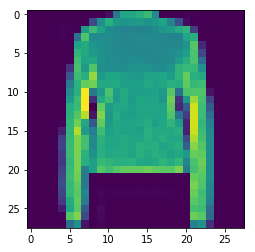

In [82]:
plt.imshow(x_pred_true[0].reshape((28, 28)))

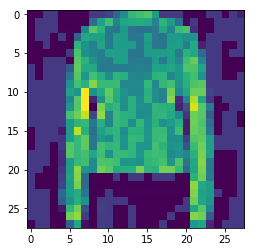

In [83]:
plt.imshow(new_image.reshape((28, 28)))

In [84]:
np.argmax(model.predict(new_image))

2

In [85]:
pred = model.predict(np.array([new_image[0],]))
print(pred)

[[3.1112677e-07 1.6912661e-08 9.9985051e-01 2.5991486e-08 1.4659390e-04
  1.0438733e-10 2.4583944e-06 2.1880002e-09 2.8920812e-08 4.4273721e-10]]


In [86]:
pred = pred[0]
prob = np.exp(pred) / np.sum(np.exp(pred))
print(prob)

[0.08533864 0.08533861 0.23193972 0.08533861 0.08535112 0.08533861
 0.08533882 0.08533861 0.08533861 0.08533861]


In [87]:
model.predict(np.array([x_pred_true[0],]))

array([[6.6258188e-04, 1.3711763e-06, 9.9007517e-01, 2.0163196e-04,
        1.1448433e-03, 3.6945980e-07, 7.8882128e-03, 5.3226216e-07,
        2.3902121e-05, 1.3518261e-06]], dtype=float32)

In [89]:
model.predict(np.array([x_pred_true[0],])).argmax()

2

In [90]:
pred = model.predict(np.array([x_pred_true[0],]))
prob = np.exp(pred) / np.sum(np.exp(pred))
print(prob)

[[0.08551655 0.08546003 0.23000994 0.08547714 0.0855578  0.08545994
  0.08613671 0.08545995 0.08546196 0.08546002]]


In [91]:
x = x_pred_true[0]
x = np.reshape(x,(-1,28,28,1))
print(x.shape)

(1, 28, 28, 1)


In [92]:
print(y_pred_true[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [93]:
target = 6
print(target)
target = to_categorical(target,10,dtype='float32')
print(target)

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [94]:
target_variable = K.variable(target)
print(model.output)
print(target_variable)

Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)
<tf.Variable 'Variable_2:0' shape=(10,) dtype=float32_ref>


In [95]:
loss = -1*metrics.categorical_crossentropy(model.output,target_variable)
gradients = K.gradients(loss,model.input)
get_grad_values = K.function([model.input],gradients)
grad_values = get_grad_values([x])[0]
delta = K.sign(grad_values) 

In [96]:
alpha = 0.1
x_adv = x - alpha * delta

In [97]:
x_adv

<tf.Tensor 'sub_7:0' shape=(1, 28, 28, 1) dtype=float32>

In [98]:
print(delta)

Tensor("Sign_2:0", shape=(1, 28, 28, 1), dtype=float32)


In [99]:
sess = K.get_session()
x_adv_val = sess.run(x_adv,feed_dict={model.input:x})
model.predict(x_adv_val).argmax()

2

In [100]:
new_image = x_adv_val

In [101]:
print(x_pred_true[0] - new_image)

[[[[ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.10000001]
   [ 0.09999999]
   [ 0.09999997]
   [-0.10000005]
   [-0.10000005]
   [-0.10000004]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [ 0.        ]]

  [[ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.10000001]
   [-0.09999999]
   [-0.10000005]
   [ 0.09999997]
   [-0.10000005]
   [-0.10000005]
   [-0.10000005]
   [-0.10000005]
   [ 0.09999997]
   [-0.10000005]
   [-0.1       ]
   [-0.10000001]
   [ 0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]
   [-0.1       ]]

  [[ 0.1       ]
   [-0.1       ]
   [-0.1  

In [102]:
print(new_image)

[[[[-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.09607843]
   [-0.1       ]
   [-0.09607843]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1392157 ]
   [ 0.29215688]
   [ 0.4921569 ]
   [ 0.70000005]
   [ 0.73529416]
   [ 0.7784314 ]
   [ 0.56666666]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.09215686]
   [-0.09215686]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.        ]]

  [[-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [-0.09607843]
   [-0.09607843]
   [-0.1       ]
   [-0.1       ]
   [ 0.31960785]
   [ 0.5901961 ]
   [ 0.727451  ]
   [ 0.44509807]
   [ 0.6176471 ]
   [ 0.6333334 ]
   [ 0.6411765 ]
   [ 0.61372554]
   [ 0.43333337]
   [ 0.6803922 ]
   [ 0.5509804 ]
   [ 0.34313726]
   [-0.06862745]
   [ 0.1       ]
   [-0.1       ]
   [-0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]
   [ 0.1       ]]

  [[-0.1       ]
   [ 0.1       ]
   [ 0.1  

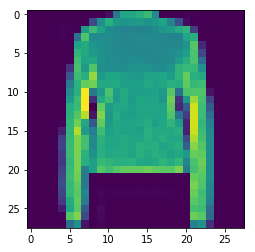

In [103]:
plt.imshow(x_pred_true[0].reshape((28, 28)))

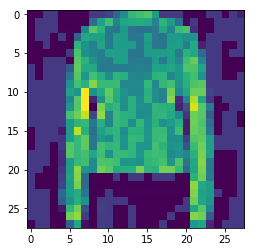

In [104]:
plt.imshow(new_image.reshape((28, 28)))

In [105]:
np.argmax(model.predict(new_image))

2

In [106]:
pred = model.predict(np.array([new_image[0],]))
print(pred)

[[3.1112677e-07 1.6912661e-08 9.9985051e-01 2.5991486e-08 1.4659390e-04
  1.0438733e-10 2.4583944e-06 2.1880002e-09 2.8920812e-08 4.4273721e-10]]


In [107]:
pred = pred[0]
prob = np.exp(pred) / np.sum(np.exp(pred))
print(prob)

[0.08533864 0.08533861 0.23193972 0.08533861 0.08535112 0.08533861
 0.08533882 0.08533861 0.08533861 0.08533861]


In [108]:
model.predict(np.array([x_pred_true[0],]))

array([[6.6258188e-04, 1.3711763e-06, 9.9007517e-01, 2.0163196e-04,
        1.1448433e-03, 3.6945980e-07, 7.8882128e-03, 5.3226216e-07,
        2.3902121e-05, 1.3518261e-06]], dtype=float32)

In [109]:
model.predict(np.array([x_pred_true[0],])).argmax()

2

In [110]:
pred = model.predict(np.array([x_pred_true[0],]))
prob = np.exp(pred) / np.sum(np.exp(pred))
print(prob)

[[0.08551655 0.08546003 0.23000994 0.08547714 0.0855578  0.08545994
  0.08613671 0.08545995 0.08546196 0.08546002]]
